<a href="https://colab.research.google.com/github/jahidahsan/Coursera_Capstone/blob/master/IBM_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM Data Science Capstone Project

This project is part of IBM Data Science Professional Certificate. The certificate program consists of 9 online courses that provides the latest job-ready tools and skills, including open source tools and libraries, Python, databases, SQL, data visualization, data analysis, statistical analysis, predictive modeling, and machine learning algorithms.
The aim of this project is to find those sectors of Islamabad that provide the best food experience to its customers. The data of sectors of Islamabad is acquired from wikipedia while the information of venues was extracted using foursquare API. For more information and detailed explanation, please refer to the Capstone report of this project.


In [64]:
#importing required libraries
import requests
import time
import pandas as pd
import re
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
pd.options.display.max_colwidth = 99
pd.set_option("display.max_rows", 999)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#To remove
CLIENT_ID = 'MPCEABWA5MNR5WOPMN3KAMG1MVCGREHBWNRYJQRZQ4ENYUCC' # your Foursquare ID
CLIENT_SECRET = 'LQA3M3Y5ZCO1IHTEMSPRB5Z2K5HMMKWFUVOUO1GOTLQFS4U0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MPCEABWA5MNR5WOPMN3KAMG1MVCGREHBWNRYJQRZQ4ENYUCC
CLIENT_SECRET:LQA3M3Y5ZCO1IHTEMSPRB5Z2K5HMMKWFUVOUO1GOTLQFS4U0


##Data Acquisition & Cleaning

In [ ]:
# Using Beautiful for Data Scrapping
source = requests.get('https://en.wikipedia.org/wiki/Sectors_of_Islamabad').text
soup = BeautifulSoup(source, 'html.parser')

In [ ]:
sectors = [i.get('title') for i in soup.find_all('a')][14:94] #sector names are listed between title index 14 and 94.

In [ ]:
sectors = pd.DataFrame(data=sectors, columns = ['Sectors of Islamabad'])

In [ ]:
sectors.head()

,Sectors of Islamabad
0,"Diplomatic Enclave, Islamabad"
1,"A-17, Islamabad"
2,"A-18, Islamabad (page does not exist)"
3,"B-17, Islamabad"
4,"B-18, Islamabad (page does not exist)"


In [ ]:
#removing string 'page does not exist' in titles where found
sectors['Sectors of Islamabad'][sectors['Sectors of Islamabad'].str.contains('page does not exist')] = [i[:-22] for i in (sectors[sectors['Sectors of Islamabad'].str.contains('page does not exist')]['Sectors of Islamabad'])]

In [ ]:
sectors.head(5)

,Sectors of Islamabad
0,"Diplomatic Enclave, Islamabad"
1,"A-17, Islamabad"
2,"A-18, Islamabad"
3,"B-17, Islamabad"
4,"B-18, Islamabad"


In [ ]:
sectors.shape

(80, 1)

In [ ]:
# Extracting the latitudes and longitudes of the sectors of Islamabad
# Address parameter is added to verify that the extracted coordinates match the given sector name.
latitudes = [] 
longitudes = []
addresses = []
for names in sectors['Sectors of Islamabad']:
    place_name = "Sector " + names + ", Pakistan"
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(place_name)
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
        addresses.append(location.address)
    else:
        latitudes.append('none')
        longitudes.append('none')
        addresses.append('none')

In [ ]:
sectors['address'] = addresses
sectors['latitude'] = latitudes
sectors['longitude'] = longitudes

In [ ]:
sectors

,Sectors of Islamabad,address,latitude,longitude
0,"Diplomatic Enclave, Islamabad","Diplomatic Enclave, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.7236,73.1118
1,"A-17, Islamabad","Sector A, Jagiot, وفاقی دارالحکومت اسلام آباد, پاکستان",33.6919,73.2171
2,"A-18, Islamabad","Sector A, Jagiot, وفاقی دارالحکومت اسلام آباد, پاکستان",33.6919,73.2171
3,"B-17, Islamabad","B 17, وفاقی دارالحکومت اسلام آباد, پاکستان",33.6904,72.8286
4,"B-18, Islamabad","18, Street 6, G-13/3, G-13, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.6568,72.9607
5,"C-15, Islamabad","15, Street 6, G-13/3, G-13, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.6565,72.9609
6,"C-16, Islamabad","16, Street 6, G-13/3, G-13, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.6567,72.9606
7,"C-17, Islamabad","17, Street 6, G-13/3, G-13, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.6565,72.961
8,"C-18, Islamabad","18, Street 6, G-13/3, G-13, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.6568,72.9607
9,"D-10, Islamabad","10, Ghauri Town Phase 3, وفاقی دارالحکومت اسلام آباد, 46330, پاکستان",33.6155,73.1303


We can see using the address column that some of the coordinates of given sectors were not given correctly. Hence these coordinates needs to be removed.

In [ ]:
remove_index = sectors[sectors['address'].str.contains('G-13|Ghauri Town|Jagiot|none')].index

In [ ]:
# The correct coordinates of G 13 that does not require removing
r = sectors[sectors['Sectors of Islamabad'].str.contains('G-13')].index

In [ ]:
remove_index = [i for i in remove_index if i not in r]

In [ ]:
sectors.drop(index = remove_index,inplace=True)
sectors.drop(index=62,inplace=True)

In [ ]:
sectors.reset_index(drop=True)

,Sectors of Islamabad,address,latitude,longitude
0,"Diplomatic Enclave, Islamabad","Diplomatic Enclave, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.7236,73.1118
1,"B-17, Islamabad","B 17, وفاقی دارالحکومت اسلام آباد, پاکستان",33.6904,72.8286
2,"D-12, Islamabad","دی - 12, وفاقی دارالحکومت اسلام آباد, 430000, پاکستان",33.7018,72.9486
3,"D-17, Islamabad","D 17, F-17, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.6571,72.8546
4,"D-18, Islamabad","D 18, F-17, Dhok Minda, وفاقی دارالحکومت اسلام آباد, پاکستان",33.6504,72.8456
5,"E-7, Islamabad","E-7, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.7275,73.0512
6,"E-9, Islamabad","E-9, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.7155,73.0201
7,"E-11, Islamabad","E-11, اسلام آباد, وفاقی دارالحکومت اسلام آباد, 44000, پاکستان",33.6939,72.9758
8,"E-16, Islamabad","E 16, F-17, Tarnol (ترنول), وفاقی دارالحکومت اسلام آباد, پاکستان",33.6524,72.883
9,"E-17, Islamabad","E 17, F-17, Naughazi, وفاقی دارالحکومت اسلام آباد, پاکستان",33.6478,72.8724


**Mapping Sector Coordinates with Folium Library**

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")
x = geolocator.geocode('Islamabad, Pakistan')
latitude = x.latitude
longitude = x.longitude

In [ ]:
map_islamabad = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, sect in zip(sectors['latitude'], sectors['longitude'], sectors['Sectors of Islamabad']):
    label = sect
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_islamabad)  
    
map_islamabad

## Exploring Venues of Islamabad with Foursquare API

**Extracting Venues of Given Sectors**

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sectors of Islamabad',
                  'latitude', 
                  'longitude', 
                  'Venue', 
                  'venue_id',
                  'Venue latitude', 
                  'Venue longitude', 
                  'Venue category']
    
    return(nearby_venues)

In [ ]:
islamabad_venues = getNearbyVenues(names=sectors['Sectors of Islamabad'],
                                   latitudes=sectors['latitude'],
                                   longitudes=sectors['longitude']
                                  )

Diplomatic Enclave, Islamabad
B-17, Islamabad
D-12, Islamabad
D-17, Islamabad
D-18, Islamabad
E-7, Islamabad
E-9, Islamabad
E-11, Islamabad
E-16, Islamabad
E-17, Islamabad
E-18, Islamabad
F-5, Islamabad
F-6, Islamabad
F-7, Islamabad
F-8, Islamabad
F-10, Islamabad
F-11, Islamabad
F-17, Islamabad
G-5, Islamabad
G-6, Islamabad
G-7, Islamabad
G-8, Islamabad
G-9, Islamabad
G-10, Islamabad
G-11, Islamabad
G-13, Islamabad
G-15, Islamabad
G-16, Islamabad
H-8, Islamabad
H-9, Islamabad
H-10, Islamabad
H-11, Islamabad
I-8, Islamabad
I-9, Islamabad
I-10, Islamabad
I-11, Islamabad
I-14, Islamabad
I-16, Islamabad


In [ ]:
print(islamabad_venues.shape)
islamabad_venues.head()

(369, 8)


,Sectors of Islamabad,latitude,longitude,Venue,venue_id,Venue latitude,Venue longitude,Venue category
0,"Diplomatic Enclave, Islamabad",33.723606,73.111830,Club 21 (French Club),4db1479793a061576851381d,33.720966,73.112339,Lounge
1,"Diplomatic Enclave, Islamabad",33.723606,73.111830,Canadian Club,4e5a1c7be4cd875e8eb7172d,33.721035,73.112292,Restaurant
2,"Diplomatic Enclave, Islamabad",33.723606,73.111830,Gloria Jean's Cafe,5212de7d11d2af9b90ead237,33.721736,73.106869,Coffee Shop
3,"Diplomatic Enclave, Islamabad",33.723606,73.111830,A Club,4cd9aad97bb06dcbf792a9b2,33.723374,73.117329,American Restaurant
4,"D-12, Islamabad",33.701818,72.948619,D-12 Markaz,596b8fc1a22db76efcd87190,33.701010,72.950250,Shopping Plaza


In [ ]:
print(islamabad_venues.shape)
print('There are {} uniques categories.'.format(len(islamabad_venues['Venue category'].unique())))

(369, 8)
There are 91 uniques categories.


In [ ]:
islamabad_venues = islamabad_venues[islamabad_venues['Venue category'].str.contains('Restaurant|Joint|Steakhouse|Sandwich|Pizza|Tea Room|Place|Ice Cream Shop|Fish & Chips|Donut|Diner|Dessert|Coffee|Café|Breakfast')].reset_index(drop=True)

In [ ]:
print(islamabad_venues.shape)
print('There are {} uniques categories.'.format(len(islamabad_venues['Venue category'].unique())))

(216, 8)
There are 35 uniques categories.


*Due to difference in Sectors' Area, the radius of value 500 was used to extract all the venues of bigger sectors which also resulted in some of the venues returning twice representing different sectors. These duplicates were removed while ensuring that those venues only represented their actual corresponding sectors.*

In [ ]:
islamabad_venues.drop(index = [72,184,185,206],inplace=True)
islamabad_venues = islamabad_venues.drop_duplicates(subset='venue_id',keep='last').reset_index(drop=True)

In [ ]:
islamabad_venues.shape

(180, 8)

In [ ]:
venue_id_list = islamabad_venues['venue_id'].tolist()

*Extracting Like Counts of the returned venues using their IDs. The Foursquare API also had other extractable details such as price tier, ratings, and tip count which could not be utilized in this project since majority of data in those requests were missing. Moreover, the Foursquare API also had free usage limitations to conform to. Hence, when replicating this project with a different city, these requests can then be useful.*

In [ ]:
#set up to pull the count of likes from the API based on venue ID

url_list = []
like_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)

In [ ]:
islamabad_venues['Total Likes'] = like_list

In [ ]:
islamabad_venues

,Sectors of Islamabad,latitude,longitude,Venue,venue_id,Venue latitude,Venue longitude,Venue category,Total Likes
0,"Diplomatic Enclave, Islamabad",33.723606,73.111830,Canadian Club,4e5a1c7be4cd875e8eb7172d,33.721035,73.112292,Restaurant,3
1,"Diplomatic Enclave, Islamabad",33.723606,73.111830,Gloria Jean's Cafe,5212de7d11d2af9b90ead237,33.721736,73.106869,Coffee Shop,6
2,"Diplomatic Enclave, Islamabad",33.723606,73.111830,A Club,4cd9aad97bb06dcbf792a9b2,33.723374,73.117329,American Restaurant,2
3,"E-7, Islamabad",33.727498,73.051239,Texas Steak House,520a66b311d2aa759eac9baa,33.727476,73.047656,Steakhouse,20
4,"E-7, Islamabad",33.727498,73.051239,Subway F-7,53341762498e11af2be50b71,33.719323,73.053343,Sandwich Place,3
5,"E-7, Islamabad",33.727498,73.051239,Scooperz,4f6b6435e4b01cb02e600800,33.720433,73.056630,Ice Cream Shop,4
6,"E-7, Islamabad",33.727498,73.051239,Chocolate,4fa3ab09e4b0ed0280a5c3d4,33.719945,73.057012,Café,0
7,"E-9, Islamabad",33.715527,73.020068,Old Cafe,4d9bff03e115721e22d4430b,33.715721,73.028961,Café,0
8,"E-9, Islamabad",33.715527,73.020068,Mr Dean Café,4f5d8d1ae4b08380694bf0de,33.715785,73.029302,Café,0
9,"E-9, Islamabad",33.715527,73.020068,The Lounge,4df782d322717445a0b5ec83,33.720911,73.011681,Diner,0


## Clustering Venues

*Generating new features from count of likes for better clustering of venues.*

In [ ]:
res_num = pd.DataFrame(islamabad_venues.pivot_table(index=['Sectors of Islamabad'], aggfunc='size')).rename(columns = {0:'No. of Venues per Sector'})
total_likes = pd.DataFrame(islamabad_venues.groupby(by="Sectors of Islamabad")["Total Likes"].sum()).rename(columns = {'Total Likes' : 'Total Likes per Sector'})

In [ ]:
islamabad_venues.rename(columns={'Total Likes': 'Venue Likes'},inplace=True)

In [ ]:
islamabad_venues = islamabad_venues.merge(total_likes,on='Sectors of Islamabad').merge(res_num,on='Sectors of Islamabad')

In [ ]:
islamabad_venues.head()

,Sectors of Islamabad,latitude,longitude,Venue,venue_id,Venue latitude,Venue longitude,Venue category,Venue Likes,Total Likes per Sector,No. of Venues per Sector
0,"Diplomatic Enclave, Islamabad",33.723606,73.111830,Canadian Club,4e5a1c7be4cd875e8eb7172d,33.721035,73.112292,Restaurant,3,11,3
1,"Diplomatic Enclave, Islamabad",33.723606,73.111830,Gloria Jean's Cafe,5212de7d11d2af9b90ead237,33.721736,73.106869,Coffee Shop,6,11,3
2,"Diplomatic Enclave, Islamabad",33.723606,73.111830,A Club,4cd9aad97bb06dcbf792a9b2,33.723374,73.117329,American Restaurant,2,11,3
3,"E-7, Islamabad",33.727498,73.051239,Texas Steak House,520a66b311d2aa759eac9baa,33.727476,73.047656,Steakhouse,20,27,4
4,"E-7, Islamabad",33.727498,73.051239,Subway F-7,53341762498e11af2be50b71,33.719323,73.053343,Sandwich Place,3,27,4


In [ ]:
# one hot encoding
islamabad_onehot = pd.get_dummies(islamabad_venues[['Venue category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
islamabad_onehot['Sectors of Islamabad'] = islamabad_venues['Sectors of Islamabad'] 
islamabad_onehot['Venue Likes'] = islamabad_venues['Venue Likes']
islamabad_onehot['No. of Venues per Sector'] = islamabad_venues['No. of Venues per Sector']
islamabad_onehot['Total Likes per Sector'] = islamabad_venues['Total Likes per Sector']

# move neighborhood column to the first column
fixed_columns = list(islamabad_onehot.columns[-4:]) + list(islamabad_onehot.columns[:-4])
islamabad_onehot = islamabad_onehot[fixed_columns]

islamabad_onehot.head()

,Sectors of Islamabad,Venue Likes,No. of Venues per Sector,Total Likes per Sector,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Dessert Shop,Diner,Donut Shop,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Halal Restaurant,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Steakhouse,Tea Room,Thai Restaurant,Wings Joint
0,"Diplomatic Enclave, Islamabad",3,3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,"Diplomatic Enclave, Islamabad",6,3,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Diplomatic Enclave, Islamabad",2,3,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"E-7, Islamabad",20,4,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,"E-7, Islamabad",3,4,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
islamabad_onehot.shape

(180, 39)

In [ ]:
def elbow_plot(data, start_K, end_K, step):

    score_list = []

    for i in range(start_K, end_K, step):
        kmeans = KMeans(i)
        model = kmeans.fit(data)
        score = model.score(data)
        score_list.append(abs(score))

    plt.plot(range(start_K, end_K, step), 
    score_list, linestyle='--', marker='o', color='b');
    plt.xlabel('# of clusters K');
    plt.ylabel('Sum of squared errors');
    plt.title('SSE vs. K');

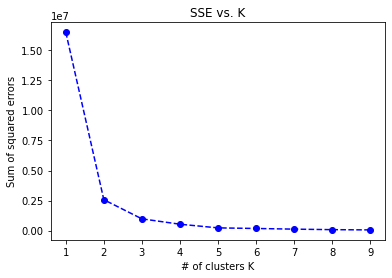

In [ ]:
islamabad_onehot_clustering = islamabad_onehot.drop('Sectors of Islamabad', 1)
elbow_plot(islamabad_onehot_clustering, 1, 10, 1)

*The elbow plot is used to obtain the optimal number of clusters. According to this plot, the elbow is formed at k = 2 but since 2 is very small number for analysis hence 3 is used for clustering.*

In [ ]:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(islamabad_onehot_clustering)
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
islamabad_venues['Cluster Labels'] = kmeans.labels_

In [ ]:
# Mapping Clusters with Folium Library
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, sector, cluster in zip(islamabad_venues['latitude'], islamabad_venues['longitude'], islamabad_venues['Sectors of Islamabad'], islamabad_venues['Cluster Labels']):
    label = folium.Popup("Sector " + str(sector) + ' Cluster ' + str(cluster))#, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining Clusters

In [6]:
#plotly
!pip install -q chart_studio
import plotly
import plotly.figure_factory as ff
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
plotly.io.renderers.default = 'colab'

     |████████████████████████████████| 71kB 2.2MB/s 


In [7]:
# Changing starting index to 1 for clarity.
islamabad_venues['Cluster Labels'] = islamabad_venues['Cluster Labels'] + 1

In [8]:
cluster_1 = islamabad_venues[islamabad_venues['Cluster Labels'] == 1]
cluster_2 = islamabad_venues[islamabad_venues['Cluster Labels'] == 2]
cluster_3 = islamabad_venues[islamabad_venues['Cluster Labels'] == 3]

In [11]:
islamabad_venues.groupby(by='Cluster Labels')[['Venue Likes', 'Total Likes per Sector', 'No. of Venues per Sector']].mean().iplot(kind='bar',xTitle='Clusters', yTitle = 'Mean Values', title= 'Cluster Differences in Mean Values')

In [66]:
islamabad_venues.groupby(by=['Cluster Labels','Sectors of Islamabad'])[['Venue Likes', 'Total Likes per Sector', 'No. of Venues per Sector']].mean().iplot(kind='bar',xTitle='(Cluster Number, Sector Names)', yTitle = 'Mean Values', title= 'Sector Differences in Mean Values')

**Cluster 1**

In [ ]:
cluster_1.loc[:,cluster_1.columns[[0,3,7,8,9,10]]]

,Sectors of Islamabad,Venue,Venue category,Venue Likes,Total Likes per Sector,No. of Venues per Sector
84,"F-8, Islamabad",New Yorker Pizza,Pizza Place,9,302,26
85,"F-8, Islamabad",Butt Karahi,Pakistani Restaurant,9,302,26
86,"F-8, Islamabad",Jade,Restaurant,9,302,26
87,"F-8, Islamabad",Tutti Frutti FroYo,Ice Cream Shop,18,302,26
88,"F-8, Islamabad",Habibi Restaurant,Indian Restaurant,30,302,26
89,"F-8, Islamabad",Kim Mun,Chinese Restaurant,8,302,26
90,"F-8, Islamabad",Bismillah Tikka & Chargha House,Pakistani Restaurant,9,302,26
91,"F-8, Islamabad",Hardee's,Fast Food Restaurant,9,302,26
92,"F-8, Islamabad",tayto,Burger Joint,9,302,26
93,"F-8, Islamabad",Second Cup,Coffee Shop,26,302,26


In [60]:
cluster_1['Venue Likes'].iplot(kind='hist',histnorm='percent',bins=10,linecolor='black',gridcolor='white',xTitle='Venue Likes', yTitle = 'Percentage', title= 'Cluster 1 Venue Likes Distribution')

**Cluster 2**

In [ ]:
cluster_2.loc[:,cluster_2.columns[[0,3,7,8,9,10,11]]]

,Sectors of Islamabad,Venue,Venue category,Venue Likes,Total Likes per Sector,No. of Venues per Sector,Cluster Labels
22,"F-6, Islamabad",Chaaye Khana,Tea Room,255,653,24,2
23,"F-6, Islamabad",Pizza Originale,Pizza Place,14,653,24,2
24,"F-6, Islamabad",The Coffee Bean & Tea Leaf,Coffee Shop,7,653,24,2
25,"F-6, Islamabad",Burning Brownie Cafe & Bake Shop,Coffee Shop,61,653,24,2
26,"F-6, Islamabad",Street 1 Cafe,Café,14,653,24,2
27,"F-6, Islamabad",Mocca Coffee,Coffee Shop,54,653,24,2
28,"F-6, Islamabad",Majlis,Middle Eastern Restaurant,5,653,24,2
29,"F-6, Islamabad",Porterhouse,Steakhouse,13,653,24,2
30,"F-6, Islamabad",Street 1 Cafe,Italian Restaurant,71,653,24,2
31,"F-6, Islamabad",Crema,Café,6,653,24,2


In [61]:
cluster_2['Venue Likes'].iplot(kind='hist',histnorm='percent',bins=50,linecolor='black',gridcolor='white',xTitle='Venue Likes', yTitle = 'Percentage', title= 'Cluster 2 Venue Likes Distribution')

**Cluster 3**

In [ ]:
cluster_3.loc[:,cluster_3.columns[[0,3,7,8,9,10,11]]]

,Sectors of Islamabad,Venue,Venue category,Venue Likes,Total Likes per Sector,No. of Venues per Sector,Cluster Labels
0,"Diplomatic Enclave, Islamabad",Canadian Club,Restaurant,3,11,3,3
1,"Diplomatic Enclave, Islamabad",Gloria Jean's Cafe,Coffee Shop,6,11,3,3
2,"Diplomatic Enclave, Islamabad",A Club,American Restaurant,2,11,3,3
3,"E-7, Islamabad",Texas Steak House,Steakhouse,20,27,4,3
4,"E-7, Islamabad",Subway F-7,Sandwich Place,3,27,4,3
5,"E-7, Islamabad",Scooperz,Ice Cream Shop,4,27,4,3
6,"E-7, Islamabad",Chocolate,Café,0,27,4,3
7,"E-9, Islamabad",Old Cafe,Café,0,0,3,3
8,"E-9, Islamabad",Mr Dean Café,Café,0,0,3,3
9,"E-9, Islamabad",The Lounge,Diner,0,0,3,3


In [62]:
cluster_3['Venue Likes'].iplot(kind='hist',histnorm='percent',bins=10,linecolor='black',gridcolor='white',xTitle='Venue Likes', yTitle = 'Percentage', title= 'Cluster 3 Venue Likes Distribution')

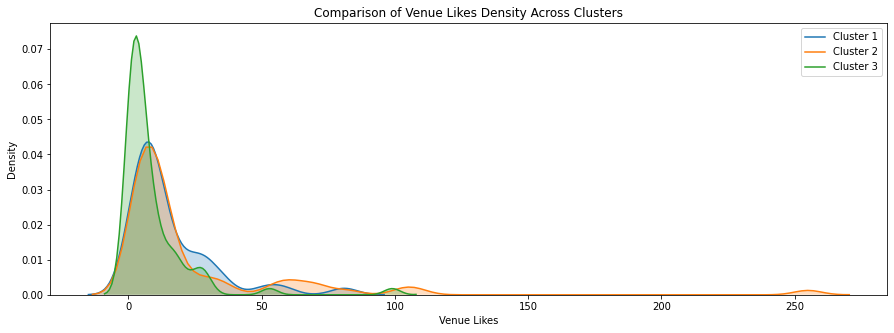

In [65]:
plt.figure(figsize=(15, 5))
sns.kdeplot(cluster_1['Venue Likes'], label = 'Cluster 1',shade=True)
sns.kdeplot(cluster_2['Venue Likes'], label = 'Cluster 2',shade=True)
sns.kdeplot(cluster_3['Venue Likes'], label = 'Cluster 3', shade=True)

plt.xlabel('Venue Likes'); plt.ylabel('Density'); plt.title('Comparison of Venue Likes Density Across Clusters');

In [82]:
#top 10 most popular venues
islamabad_venues.loc[:,islamabad_venues.columns[[0,3,7,8,9,10,11]]].sort_values(by='Venue Likes',ascending=False).reset_index(drop=True).head(10)

,Sectors of Islamabad,Venue,Venue category,Venue Likes,Total Likes per Sector,No. of Venues per Sector,Cluster Labels
0,"F-6, Islamabad",Chaaye Khana,Tea Room,255,653,24,2
1,"F-7, Islamabad",Roasters Coffee House & Grill,Burger Joint,108,827,38,2
2,"F-7, Islamabad",Hardee's,Fast Food Restaurant,103,827,38,2
3,"G-7, Islamabad",Savour Foods,Pakistani Restaurant,99,153,6,3
4,"F-7, Islamabad",Tuscany Courtyard,Italian Restaurant,82,827,38,2
5,"F-11, Islamabad",Gloria Jean's,Coffee Shop,81,366,17,1
6,"F-6, Islamabad",Street 1 Cafe,Italian Restaurant,71,653,24,2
7,"F-6, Islamabad",Nando's,Portuguese Restaurant,70,653,24,2
8,"F-7, Islamabad",Kabul Restaurant,Afghan Restaurant,63,827,38,2
9,"F-6, Islamabad",Burning Brownie Cafe & Bake Shop,Coffee Shop,61,653,24,2


## Conclusion

In conclusion, when it comes to having the best food experience in the city of Islamabad, based on the results of this project, a travel advisor can recommend the restaurants of Sectors F-6 and F-7 as a must visit while the restaurants of Sectors F-8 and F-11 can be considered highly recommended. The full report for this project where the results are discussed is available by clicking the link [here](https://github.com/jahidahsan/Coursera_Capstone/blob/master/Capstone%20Report.pdf).